In [ ]:
# 1.Загрузите файл HR.csv в pandas dataframe - 5 баллов

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# 2.Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение) - 10 баллов

In [3]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# 3.Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. 
# Определите две самые скоррелированные и две наименее скоррелированные переменные - 10 баллов

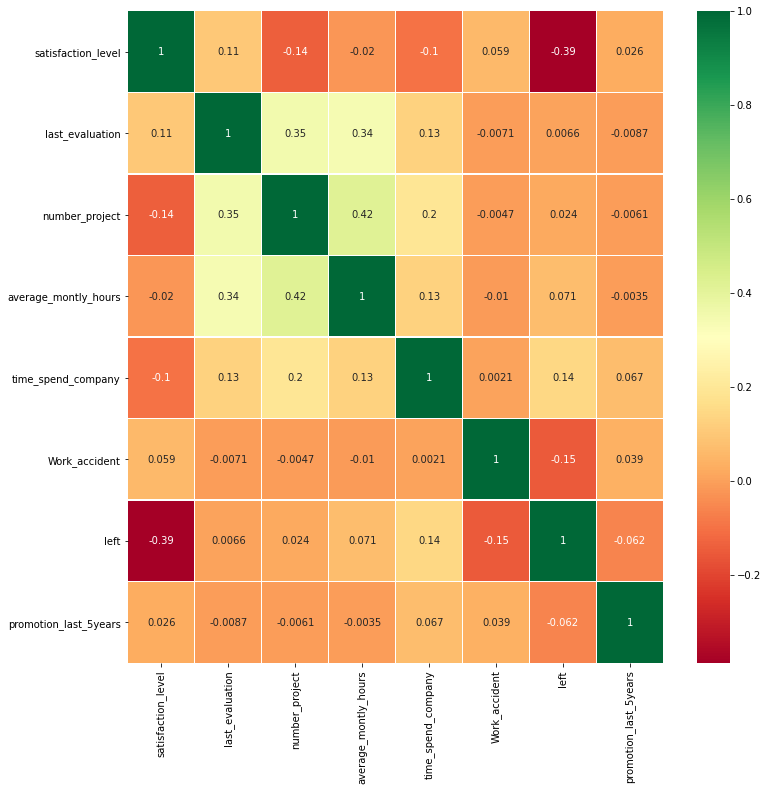

In [12]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
# Две самые скореллированные переменные: Среднее количество часов на рабочем месте в месяц и Количество проектов, выполненных за время работы
# Две наименее скоррелированные переменные: Уровень удовлетворенности работой и уволился ли сотрудник

In [ ]:
# 4.Рассчитайте сколько сотрудников работает в каждом департаменте - 5 баллов

In [4]:
data['department'].value_counts().head(10)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [ ]:
# 5.Показать распределение сотрудников по зарплатам - 5 баллов

In [5]:
data['salary'].value_counts(normalize=True).head()

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

In [ ]:
# 6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности - 5 баллов

In [8]:
for x in data['department'].unique():
    data_sales = data[data.department == x]
    print(x, "salary")
    print()
    print(data_sales['salary'].value_counts(normalize=True).head())
    print()


sales salary

low       0.507005
medium    0.428019
high      0.064976
Name: salary, dtype: float64

accounting salary

low       0.466754
medium    0.436767
high      0.096480
Name: salary, dtype: float64

hr salary

medium    0.485792
low       0.453315
high      0.060893
Name: salary, dtype: float64

technical salary

low       0.504412
medium    0.421691
high      0.073897
Name: salary, dtype: float64

support salary

low       0.514132
medium    0.422611
high      0.063257
Name: salary, dtype: float64

management salary

high      0.357143
medium    0.357143
low       0.285714
Name: salary, dtype: float64

IT salary

low       0.496333
medium    0.436023
high      0.067645
Name: salary, dtype: float64

product_mng salary

low       0.500000
medium    0.424612
high      0.075388
Name: salary, dtype: float64

marketing salary

low       0.468531
medium    0.438228
high      0.093240
Name: salary, dtype: float64

RandD salary

medium    0.472681
low       0.462516
high      0.064803


In [ ]:
# 7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом - 10 баллов

In [13]:
data.groupby('salary').mean()[['average_montly_hours']]

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


In [ ]:
# Гипотеза не подтвердилась

In [ ]:
# 8.Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
# ●Доля сотрудников с повышением за последние 5 лет
# ●Средняя степень удовлетворенности
# ●Среднее количество проектов


In [34]:
data['left'].value_counts().head().to_frame() # количество уволившихся и неуволившихся сотрудников

,left
0,11428
1,3571


In [36]:
data.groupby('left').sum()[['promotion_last_5years']] # сколько из уволившихся и работающих получали повышение за последние 5 лет

,promotion_last_5years
left,
0,300
1,19


In [38]:
data.groupby('left')['promotion_last_5years'].value_counts(normalize=True) # Доля сотрудников с повышением за последние 5 лет

left  promotion_last_5years
0     0                        0.973749
      1                        0.026251
1     0                        0.994679
      1                        0.005321
Name: promotion_last_5years, dtype: float64

In [ ]:
#2.6% среди неуволившихся и 0,53% среди уволившихся

In [19]:
data.groupby('left').mean()[['satisfaction_level']] # ●Средняя степень удовлетворенности

,satisfaction_level
left,
0,0.666810
1,0.440098


In [ ]:
# Средняя степень удовлетворенности 66,7% среди неуволившихся и 44% среди уволившихся

In [21]:
data.groupby('left').mean()[['number_project']] # ●Среднее количество проектов

,number_project
left,
0,3.786664
1,3.855503


In [ ]:
# Среднее количество проектов 3,77 среди неуволившихся и 3,855 среди уволившихся